In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
_1_SetPoint = [-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1,-2.2,-2.3,-2.4,-2.5,-2.6,-2.7,-2.8,-2.9,-3.0,-3.1,-3.2,-3.3,-3.4,-3.5,-3.6,-3.7,-3.8,-3.9,-4.0,-4.1,-4.2,
               -4.3,-4.4]
_1_PowerInRail = [0.209,0.261,0.384,0.570,0.868,1.687,3.060,5.149,8.380,13.52,21.70,34.32,51.77,76.00,106.8,145.5,197.9,270.6,371.5,490.7,673.3,893,1370,2103,
                  3233,4992,7699,11720,17580,27400,40000]
_1_LogPDVoltage = [1.285,1.337,1.426,1.515,1.605,1.694,1.783,1.872,1.962,2.050,2.140,2.229,2.318,2.408,2.497,2.586,2.675,2.765,2.853,2.943,3.032,3.121,3.210,
                   3.299,3.388,3.478,3.567,3.656,3.745,3.834,3.907]
_1_ServoOutput = [0.025,0.110,0.168,0.215,0.255,0.250,0.273,0.306,0.336,0.366,0.395,0.425,0.458,0.492,0.531,0.571,0.619,0.666,0.717,0.780,0.843,0.907,0.944,
                  0.981,1.019,1.057,1.098,1.141,1.188,1.235,1.625]

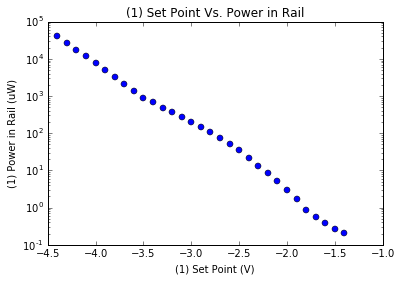

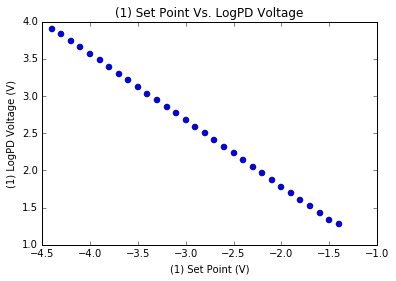

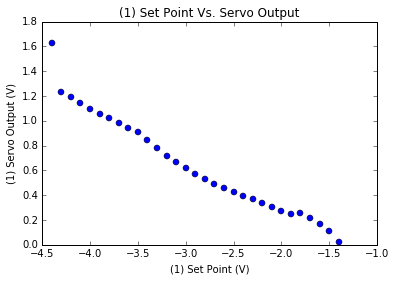

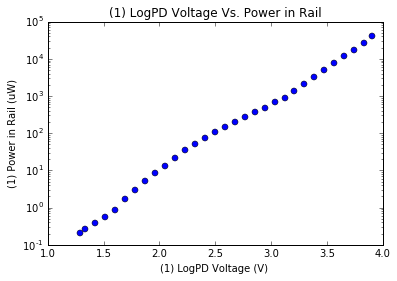

In [5]:
plt.figure(1)
plt.plot(_1_SetPoint, _1_PowerInRail, 'o')
plt.yscale("log")
plt.ylabel("(1) Power in Rail (uW)")
plt.xlabel("(1) Set Point (V)")
plt.title("(1) Set Point Vs. Power in Rail")
plt.savefig("(1) Set Point Vs. Power in Rail.png")
plt.figure(2)
plt.plot(_1_SetPoint, _1_LogPDVoltage, 'o')
plt.ylabel("(1) LogPD Voltage (V)")
plt.xlabel("(1) Set Point (V)")
plt.title("(1) Set Point Vs. LogPD Voltage")
plt.savefig("(1) Set Point Vs. LogPD Voltage.png")
plt.figure(3)
plt.plot(_1_SetPoint, _1_ServoOutput, 'o')
plt.ylabel("(1) Servo Output (V)")
plt.xlabel("(1) Set Point (V)")
plt.title("(1) Set Point Vs. Servo Output")
plt.savefig("(1) Set Point Vs. Servo Output.png")
plt.figure(4)
plt.plot(_1_LogPDVoltage,_1_PowerInRail , 'o')
plt.yscale("log")
plt.ylabel("(1) Power in Rail (uW)")
plt.xlabel("(1) LogPD Voltage (V) ")
plt.title("(1) LogPD Voltage Vs. Power in Rail")

In [9]:
_2_SetPoint = [-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1,-2.2,-2.3,-2.4,-2.5,-2.6,-2.7,-2.8,-2.9,-3.0,-3.1,-3.2,-3.3,-3.4,-3.5,-3.6,-3.7,-3.8,-3.9,-4.0,-4.1,
               -4.2,-4.3,-4.4]
_2_PowerInRail = [0.214,0.263,0.386,0.573,0.862,1.514,2.835,5.064,8.77,15.89,25.10,36.15,52.67,77.00,105.2,143.0,194.8,266.3,364.6,484.7,658.9,888,1364,
                  2096,3225,4980,7674,11950,18580,27450,38400]

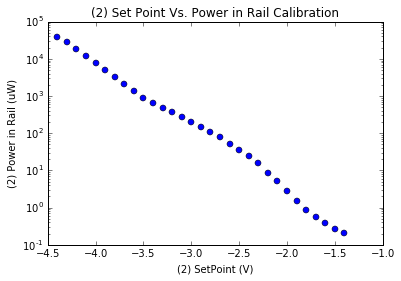

In [10]:
plt.figure(1)
plt.plot(_2_SetPoint, _2_PowerInRail, 'o')
plt.xlabel("(2) SetPoint (V)")
plt.ylabel("(2) Power in Rail (uW)")
plt.title("(2) Set Point Vs. Power in Rail Calibration")
plt.yscale("log")
plt.show()

In [100]:
def logFit(x,a,b):
    if (b<0):
        return 1e10
    else:
        return a * np.log(b*x)
def expFit(x,a,b):
    return a + np.exp(b*x)

[  2.78387311e-01   7.63877412e+02]


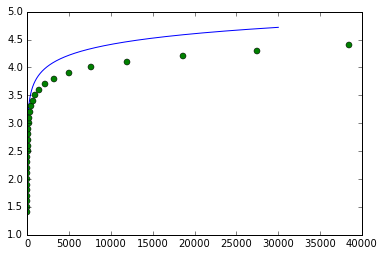

In [107]:
x = np.linspace(0.1,30000, 10000)
fitValuesLog, covarianceLog = curve_fit(logFit,_2_PowerInRail, -np.array(_2_SetPoint), [-0.25, 1000], sigma=np.power(_2_PowerInRail,1))
print(fitValuesLog)
#fitValuesExp, covarianceExp = curve_fit(expFit,-np.array(_2_SetPoint),_2_PowerInRail, sigma=np.log(_2_PowerInRail))
plt.plot(x, logFit(x,*fitValuesLog))
plt.plot(_2_PowerInRail, -np.array(_2_SetPoint), 'o')
# plt.xscale("log")
plt.show()
#print(fitValues)
#print(covariance)

In [108]:
_3_SetPoint = [-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1,-2.2,-2.3,-2.4,-2.5,-2.6,-2.7,-2.8,-2.9,-3.0,-3.1,-3.2,-3.3,-3.4,-3.5,
               -3.6,-3.7,-3.8,-3.9]
_3_PowerInRail = [0.225,0.224,0.262,0.376,0.550,0.813,1.210,1.815,2.717,4.075,6.130,9.24,13.90,20.99,31.59,47.48,71.50,107.5,161.1,241.9,362.8,544.3,820.0,
                  1234,1865,2828,4289,6526,9950,15150,23140,34200]

[  0.34816774  55.61565836]


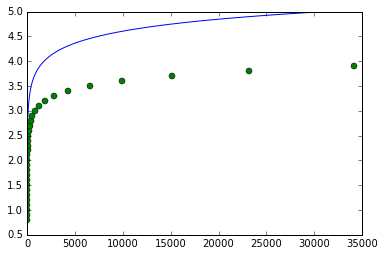

In [111]:
x = np.linspace(0.1,30000, 10000)
fitValuesLog, covarianceLog = curve_fit(logFit,_3_PowerInRail, -np.array(_3_SetPoint), [-0.25, 1000], sigma=np.power(_3_PowerInRail,1))
print(fitValuesLog)
#fitValuesExp, covarianceExp = curve_fit(expFit,-np.array(_2_SetPoint),_2_PowerInRail, sigma=np.log(_2_PowerInRail))
plt.plot(x, logFit(x,*fitValuesLog))
plt.plot(_3_PowerInRail, -np.array(_3_SetPoint), 'o')
# plt.xscale("log")
plt.show()
#print(fitValues)
#print(covariance)